In [124]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [125]:
df = pd.read_csv("../data/clean/bank-additional-clean.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [126]:
df.shape

(38234, 21)

In [127]:
colors = {'no': 'red',
          'yes': 'lightgreen'}

In [128]:
df.insert(21,"y_count", df["y"])

## Does the day of week affect deposit outcome?

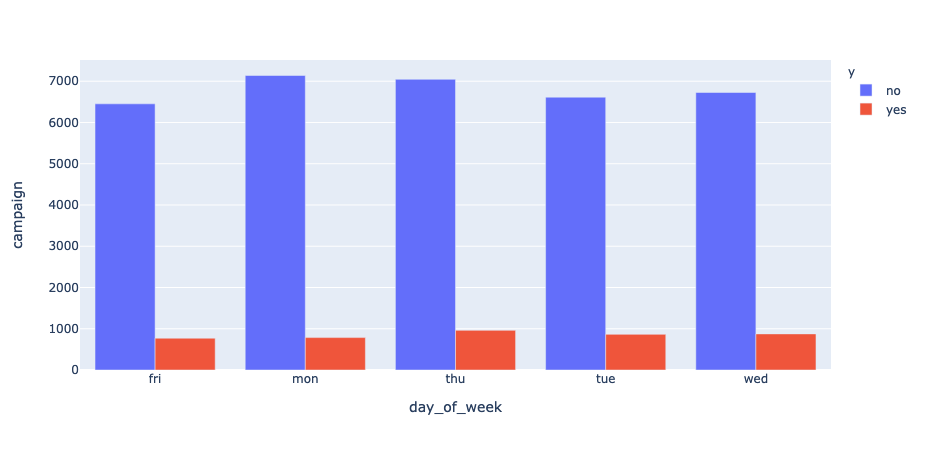

In [129]:
df_y = df.groupby(["day_of_week", "y"]).campaign.count().reset_index()
fig = px.bar(df_y, x='day_of_week', y="campaign", color="y", barmode="group")
fig.show()

## How does age affect positive deposit outcome

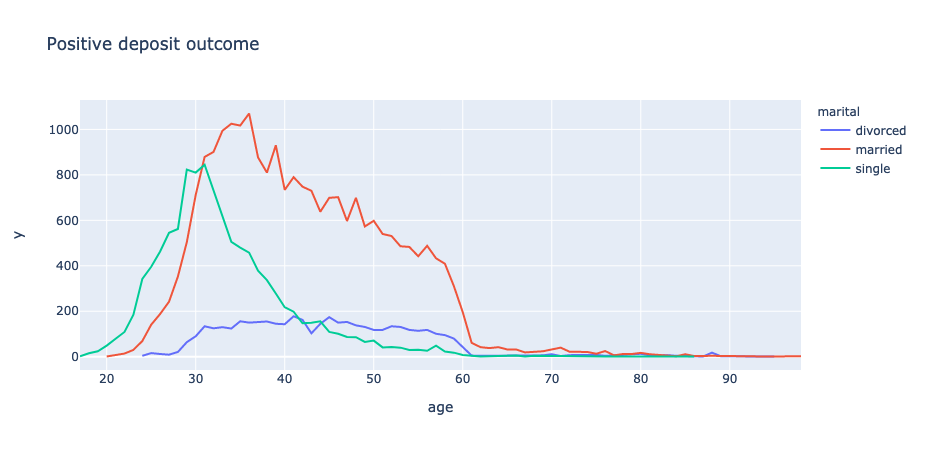

In [130]:
df_yes = df[df.y=="yes"]
df_age_yes = df.groupby(['marital', 'age']).y.count().reset_index()
fig = px.line(df_age_yes, x="age", y="y", color="marital", title="Positive deposit outcome")
fig.show()

## What are the jobs of the people willing to deposit?

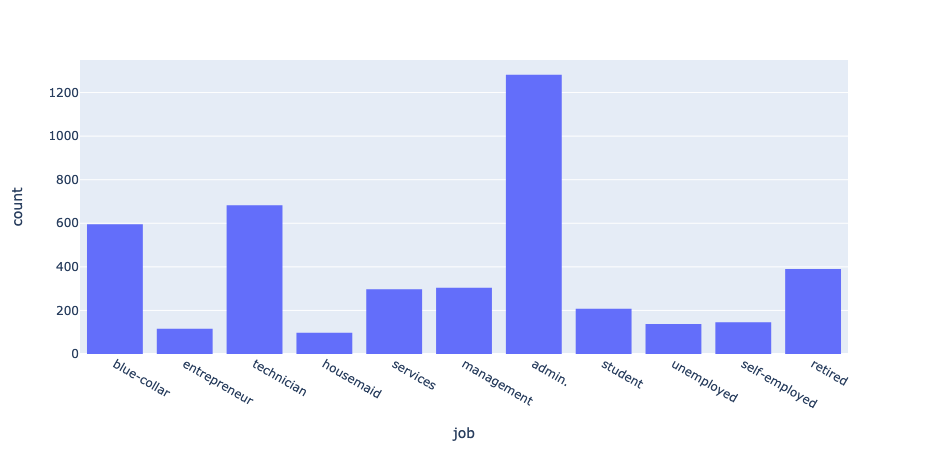

In [131]:
fig = px.histogram(df_yes, x='job')
fig.show()

## Does this mean that "admins" are more likely to deposit or are they simply being called more than others on purpose?

In [132]:
job_count = df.groupby(['job', 'y']).agg({'y_count': 'count'})
job_count

y_count
job           y           
admin.        no      8652
              yes     1282
blue-collar   no      7964
              yes      595
entrepreneur  no      1244
              yes      116
housemaid     no       889
              yes       98
management    no      2424
              yes      304
retired       no      1186
              yes      390
self-employed no      1203
              yes      146
services      no      3417
              yes      297
student       no       480
              yes      208
technician    no      5693
              yes      683
unemployed    no       825
              yes      138

In [133]:
stats_job = job_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
stats_job

,job,y,y_count
0,admin.,no,87.094826
1,admin.,yes,12.905174
2,blue-collar,no,93.048253
3,blue-collar,yes,6.951747
4,entrepreneur,no,91.470588
5,entrepreneur,yes,8.529412
6,housemaid,no,90.070922
7,housemaid,yes,9.929078
8,management,no,88.856305
9,management,yes,11.143695


In [134]:
stats_job = stats_job.rename(columns={"y_count": "y_percentage"})

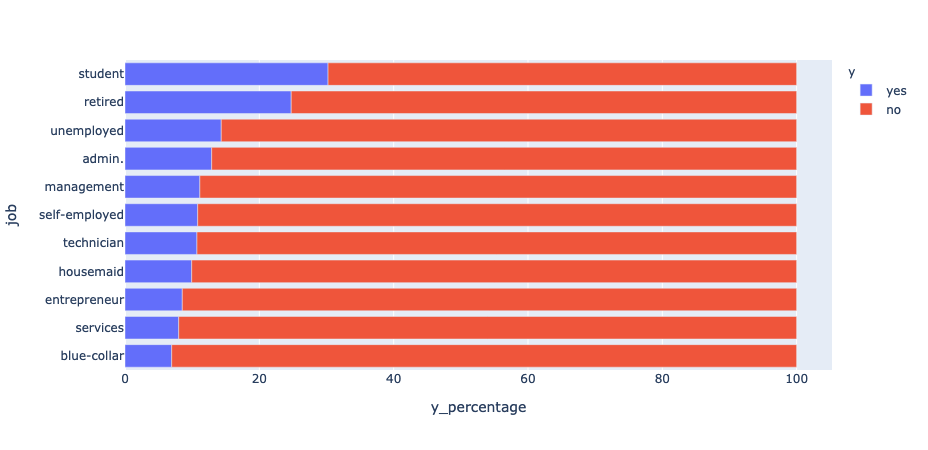

In [135]:
stats_job.sort_values(by=['y_percentage'],ascending=True, inplace=True)
fig = px.bar(stats_job, x='y_percentage', y="job", color="y", orientation='h', )
fig.show()

## Deposit outcome considering marital status in percentage

In [136]:
marital_count = df.groupby(['marital', 'y']).agg({'y_count': 'count'})
marital_count

y_count
marital  y           
divorced no      3853
         yes      448
married  no     20837
         yes     2340
single   no      9287
         yes     1469

In [137]:
stats_marital = marital_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
stats_marital

,marital,y,y_count
0,divorced,no,89.583818
1,divorced,yes,10.416182
2,married,no,89.903784
3,married,yes,10.096216
4,single,no,86.342507
5,single,yes,13.657493


In [138]:
stats_marital = stats_marital.rename(columns={"y_count": "y_percentage"})

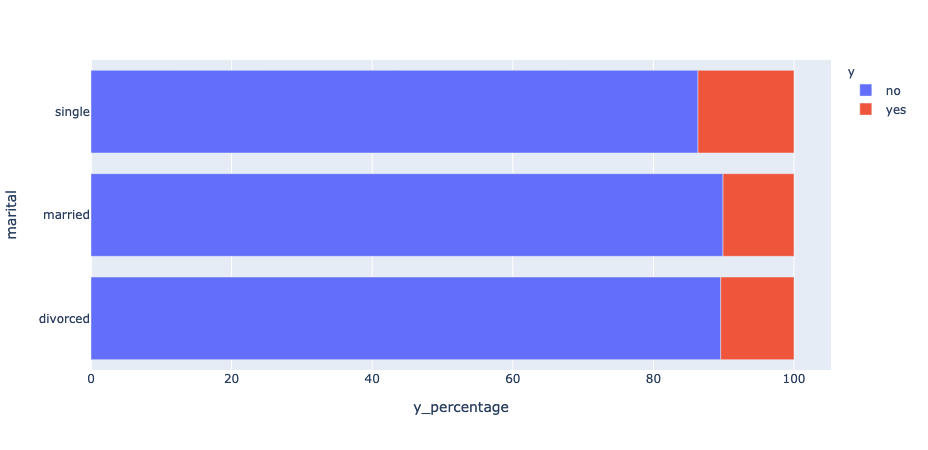

In [139]:
fig = px.bar(stats_marital, x='y_percentage', y="marital", color="y", orientation='h')
fig.show()